In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
df = pd.read_csv('Wrangled.csv')

C:\Users\veron\AppData\Local\Temp\ipykernel_5304\2296681516.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Wrangled.csv')


In [3]:
df = df[['HCPCS_Cd', 'Tot_Rfrg_Prvdrs', 'Tot_Suplrs', 'Avg_Suplr_Sbmtd_Chrg']]

In [4]:
tot_rfrg_prvdrs_max = df['Tot_Rfrg_Prvdrs'].max()
df.loc[df['Tot_Rfrg_Prvdrs'] == tot_rfrg_prvdrs_max]

,HCPCS_Cd,Tot_Rfrg_Prvdrs,Tot_Suplrs,Avg_Suplr_Sbmtd_Chrg
592,A4253,233762,43511,61.932717


In [5]:
blood_glucose_test = df[df.HCPCS_Cd == 'A4253']
blood_glucose_test.T

,592,1999,2624,3186,3987,4884,5882,6642,7284,7821,...,38072,38787,39428,39723,39856,40037,40109,40154,40206,40228
HCPCS_Cd,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253,...,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253,A4253
Tot_Rfrg_Prvdrs,233762,3093,509,4387,2258,22583,3630,2900,821,649,...,1872,4895,470,41,1093,59,8,7,7,9
Tot_Suplrs,43511,1406,204,2262,924,6656,1746,1825,543,853,...,843,2288,251,17,244,42,68,47,51,30
Avg_Suplr_Sbmtd_Chrg,61.932717,56.55811,64.369821,66.860627,49.084897,66.023182,58.680633,69.086442,69.558235,59.030813,...,62.519122,66.743051,62.289233,72.101268,45.837617,62.153743,56.325625,65.26864,63.750638,63.44035


In [6]:
dummy_df = pd.get_dummies(blood_glucose_test)

In [7]:
X = dummy_df.drop(columns='Avg_Suplr_Sbmtd_Chrg')
y = dummy_df['Avg_Suplr_Sbmtd_Chrg']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [10]:
#Linear Regression

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
y_pred_lr = LR_model.predict(X_test)
mean_mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error:", mean_mse_lr)

Mean Squared Error: 6405.543795617111


In [11]:
cv_scores_lr = cross_val_score(LR_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_lr= -cv_scores_lr
cv_mean_mse_lr = cv_scores_lr.mean()
print("Mean Squared Error (Cross-Validation):", cv_mean_mse_lr)

Mean Squared Error (Cross-Validation): 5886.326085509364


In [12]:
#KNN Regression

from sklearn.neighbors import KNeighborsRegressor

param_grid_knn = {'n_neighbors': range(1, 20)}
grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error')
grid_search_knn.fit(X_train, y_train)
best_k = grid_search_knn.best_params_['n_neighbors']

In [13]:
knn_model = KNeighborsRegressor(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mean_mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mean_mse_knn)

Mean Squared Error: 43.615117462676146


In [14]:
cv_scores_knn = cross_val_score(knn_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_knn= -cv_scores_knn
cv_mean_mse_knn = cv_scores_knn.mean()
print("Mean Squared Error (Cross-Validation):", cv_mean_mse_knn)

Mean Squared Error (Cross-Validation): 28.085586428720063


In [15]:
#Support Vector Regression (SVR)

from sklearn.svm import SVR

svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mean_mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error:", mean_mse_svr)

Mean Squared Error: 91075.22140307543


In [16]:
cv_scores_svr = cross_val_score(svr_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_svr= -cv_scores_svr
cv_mean_mse_svr = cv_scores_svr.mean()
print("Mean Squared Error (Cross-Validation):", cv_mean_mse_svr)

Mean Squared Error (Cross-Validation): 26344.92175023906


In [17]:
#Gradient Boosting Regression

from sklearn.ensemble import GradientBoostingRegressor

param_grid_gbr = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}
grid_search_gbr = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, y_train)
best_params_gbr = grid_search_gbr.best_params_
print(best_params_gbr)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [18]:
gbr_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.01, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)
y_pred_gbr = gbr_model.predict(X_test)
mean_mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print("Mean Squared Error:", mean_mse_gbr)

Mean Squared Error: 44.30706446615934


In [19]:
cv_scores_gbr = cross_val_score(gbr_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_gbr= -cv_scores_gbr
cv_mean_mse_gbr = cv_scores_gbr.mean()
print("Mean Squared Error (Cross-Validation):", cv_mean_mse_gbr)

Mean Squared Error (Cross-Validation): 29.136919351462485


In [20]:
#Random Forest Regression

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
print(best_params_rf)

{'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 150}


In [21]:
rf_model = RandomForestRegressor(n_estimators=150, max_depth=3, min_samples_split=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mean_mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", mean_mse_rf)

Mean Squared Error: 45.240655153635224


In [22]:
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_rf= -cv_scores_rf
cv_mean_mse_rf = cv_scores_rf.mean()
print("Mean Squared Error (Cross-Validation):", cv_mean_mse_rf)

Mean Squared Error (Cross-Validation): 31.253626949891647


In [26]:
myLabels = [ 'Linear Regression','KNN','SVR','Gradient Boost','Random Forest']
score = [  cv_mean_mse_lr,cv_mean_mse_knn,cv_mean_mse_svr,cv_mean_mse_gbr,cv_mean_mse_rf]
Accuracy_score = [mean_mse_lr,mean_mse_knn,mean_mse_svr,mean_mse_gbr,mean_mse_rf]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score)), 
               columns =['Algorithm', 'CV_Score' ]) 
print(score_tab_acc)

score_tab

           Algorithm  Model accuracy score
0  Linear Regression           6405.543796
1                KNN             43.615117
2                SVR          91075.221403
3     Gradient Boost             44.307064
4      Random Forest             45.240655


,Algorithm,CV_Score
0,Linear Regression,5886.326086
1,KNN,28.085586
2,SVR,26344.921750
3,Gradient Boost,29.136919
4,Random Forest,31.253627


In [ ]:
#Linear Regression performed the best

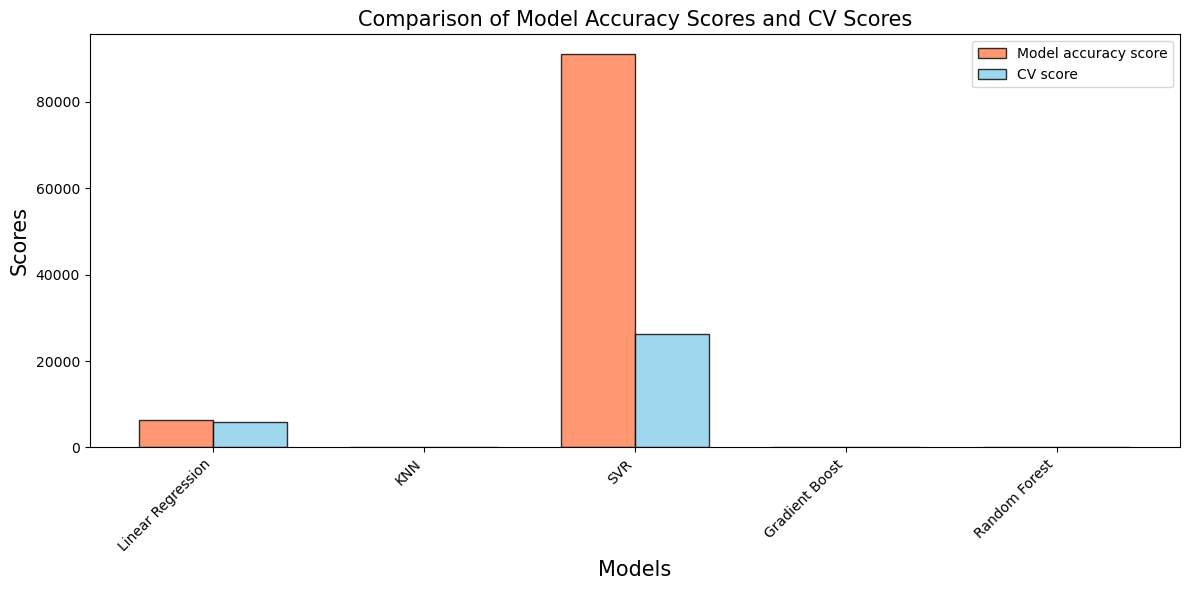

In [35]:
bar_width = 0.35
r1 = np.arange(len(myLabels))
r2 = [x + bar_width for x in r1]
plt.figure(figsize=(12, 6))
plt.bar(r1, Accuracy_score, color='coral', width=bar_width, edgecolor='k', alpha=0.8, label='Model accuracy score')
plt.bar(r2, score, color='skyblue', width=bar_width, edgecolor='k', alpha=0.8, label='CV score')
plt.xlabel('Models', fontsize=15)
plt.ylabel('Scores', fontsize=15)
plt.title('Comparison of Model Accuracy Scores and CV Scores', fontsize=15)
plt.xticks([r + bar_width/2 for r in range(len(myLabels))], myLabels, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()